# Data visualization
### By Saud Alarifi

### Project Overview
**In this project we will wrangle , explorate and cummuincate insights of the dataset of `Ford Go Bike System - 2018 - First quarter`.** 

## Investigation Overview

> Our main goal is to find the features that related directly or indirectly to trip duration .

## Dataset Overview

> The dataset of First quarter of FordGoBike system consist of (312902, 14) rows and columns respectively.  .

## Project Timeline
- **Wrangling Process**
- **Univariate Exploration**
- **Bivariate Exploration**
- **Multivariate Exploration**
- **Observed results**
- **Referncees**



### - Wrangling process

In [1]:
#Import all required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Downloading the dataset manually into a pandas dataframe and joining the data of the first 3 months. 
def reading(arg):
    return pd.read_csv(arg)
go_bike_m1 = reading('201801-fordgobike-tripdata.csv')
go_bike_m2 = reading('201802-fordgobike-tripdata.csv')
go_bike_m3 = reading('201803-fordgobike-tripdata.csv')
go_bike_q1 = pd.concat([go_bike_m1, go_bike_m2 , go_bike_m3], ignore_index=True)


In [3]:
# simple look over the data set
print(go_bike_q1.shape)
go_bike_q1.head()

(312902, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


**The dataset of First quarter consist of (312902, 14) rows and columns respectively**.

In [4]:
#Checking the missing values
go_bike_q1.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          24966
member_gender              24854
bike_share_for_all_trip        0
dtype: int64

In [5]:
# the datatype of each column.
go_bike_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312902 entries, 0 to 312901
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             312902 non-null  int64  
 1   start_time               312902 non-null  object 
 2   end_time                 312902 non-null  object 
 3   start_station_id         312902 non-null  int64  
 4   start_station_name       312902 non-null  object 
 5   start_station_latitude   312902 non-null  float64
 6   start_station_longitude  312902 non-null  float64
 7   end_station_id           312902 non-null  int64  
 8   end_station_name         312902 non-null  object 
 9   end_station_latitude     312902 non-null  float64
 10  end_station_longitude    312902 non-null  float64
 11  bike_id                  312902 non-null  int64  
 12  user_type                312902 non-null  object 
 13  member_birth_year        287936 non-null  float64
 14  memb

**There is around 25k missing values presented in 2 columns in the dataset.**

In [6]:
#Drop the rows with missing values
go_bike_q1.dropna(inplace=True)


In [7]:
# Statical look over the dataset
go_bike_q1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,287936.000000,287936.000000,287936.000000,287936.000000,287936.000000,287936.000000,287936.000000,287936.000000,287936.000000
mean,739.475130,111.016361,37.767327,-122.352475,108.594913,37.767433,-122.351606,2023.613282,1981.493888
std,1928.116754,92.646397,0.101192,0.119806,91.995653,0.101014,0.119094,1091.362588,10.760571
min,61.000000,3.000000,37.312854,-122.444293,3.000000,37.312854,-122.444293,11.000000,1900.000000
25%,346.000000,30.000000,37.771058,-122.411738,30.000000,37.771058,-122.410662,1112.000000,1976.000000
50%,533.000000,81.000000,37.781270,-122.397405,81.000000,37.781383,-122.397086,2117.000000,1984.000000
75%,809.000000,176.000000,37.795392,-122.291376,176.000000,37.795392,-122.291415,2992.000000,1989.000000
max,85471.000000,343.000000,37.880222,-121.874119,343.000000,37.880222,-121.874119,3756.000000,2000.000000


In [8]:
#Create month column.
go_bike_q1['month'] = pd.DatetimeIndex(go_bike_q1['start_time']).month
print(go_bike_q1.month.value_counts())
go_bike_q1.month.sample(8)

3    102347
2     98626
1     86963
Name: month, dtype: int64


88670     1
28934     1
145414    2
5374      1
59901     1
27918     1
115039    2
133531    2
Name: month, dtype: int64

**The months represented as number instead of names !.**

In [9]:
#Convert the months from numbers to names.
import calendar
go_bike_q1['month'] = go_bike_q1['month'].apply(lambda x: calendar.month_abbr[x])
go_bike_q1.month.sample(8)

302509    Mar
132738    Feb
159544    Feb
202351    Mar
166532    Feb
50966     Jan
84532     Jan
146879    Feb
Name: month, dtype: object

In [10]:
#Create column to represent the duration time in minutes.
go_bike_q1['duration_min'] = go_bike_q1['duration_sec']/60
#Rearrange columns 
cols = go_bike_q1.columns.tolist()
cols = cols[-1:] + cols[:-1]
go_bike_q1 = go_bike_q1[cols]
print(list(go_bike_q1))
go_bike_q1['duration_min'].sample(3)

['duration_min', 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'month']


197662     4.466667
193473    16.666667
312460    11.750000
Name: duration_min, dtype: float64

In [11]:
#Extract the age of the users from birth column.
go_bike_q1['user_age'] = 2020 - go_bike_q1['member_birth_year']
go_bike_q1['user_age'] = go_bike_q1['user_age'].astype(int)


In [12]:
go_bike_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287936 entries, 0 to 312901
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_min             287936 non-null  float64
 1   duration_sec             287936 non-null  int64  
 2   start_time               287936 non-null  object 
 3   end_time                 287936 non-null  object 
 4   start_station_id         287936 non-null  int64  
 5   start_station_name       287936 non-null  object 
 6   start_station_latitude   287936 non-null  float64
 7   start_station_longitude  287936 non-null  float64
 8   end_station_id           287936 non-null  int64  
 9   end_station_name         287936 non-null  object 
 10  end_station_latitude     287936 non-null  float64
 11  end_station_longitude    287936 non-null  float64
 12  bike_id                  287936 non-null  int64  
 13  user_type                287936 non-null  object 
 14  memb

**Now the dataset is ready for exploratory and explanatory steps.**

**The goal of exploratory step is to find out the features related to high duration trips.**

**In other words what makes a person to spend more time in bike trip?.**

### - Univariate Exploration


- **The distribution of first quarter**

**Q/ What is the highest month by number of bikers?**

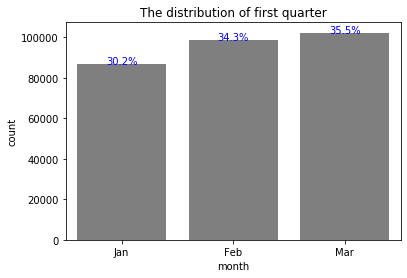

In [13]:
#By plotting Bar chart , we can identify the disturbution of Q1.
base_color = sb.color_palette()[7]
ax = sb.countplot(data = go_bike_q1, x = 'month', color = base_color)
# Set title
ax.set_title("The distribution of first quarter")
#Display percentage above bars.
n_points = go_bike_q1.shape[0]
month_counts = go_bike_q1['month'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

# get the text property for the label to get the correct count
    count = month_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'blue')
plt.show()
##this code is Provided by Udacity class room - Refernce: https://classroom.udacity.com/nanodegrees/nd002-connect/parts/1d873e04-4931-442f-a7f2-409a98b782bb/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/bd9948e9-eda5-48b7-8c6f-e97192a9ac48

**It turend out that May is on the lead by 35.6% , Feb on 2nd place by 34,1% and eventually Jan by 30.3%.** 

- **The distribution of duration in minutes**

**Q/  is the data of duration normally distributed ?**

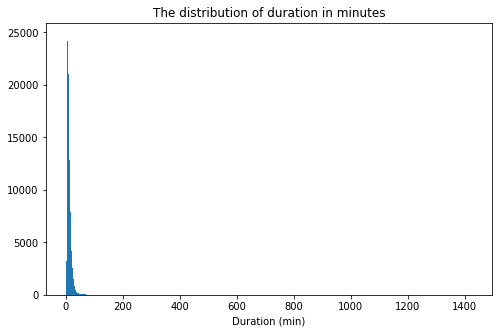

In [14]:
binsize = 1
bins = np.arange(0, go_bike_q1['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = go_bike_q1, x = 'duration_min', bins = bins)
plt.xlabel('Duration (min)')
plt.title('The distribution of duration in minutes')
plt.show()

**There is huge tail , So the optimal solution is to use Log scale instead.**

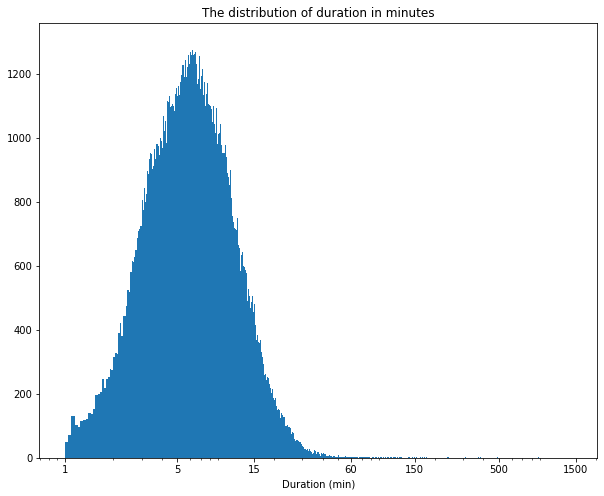

In [15]:
#Bar chart using Log scale.
log_binsize = 0.05
bins = np.arange(1, (go_bike_q1['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 8])
plt.hist(data = go_bike_q1 , x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 15 , 60 , 150 , 500 , 1500] , [1, 5, 15 , 60 , 150 , 500 , 1500])
plt.xlabel('Duration (min)')
plt.title('The distribution of duration in minutes')
plt.show()

**The disturbution of the Duration (min) looks normal but in fact there is still long right tail.**

- **User type distribution**.

**Q/ What is the type of most bikers?**

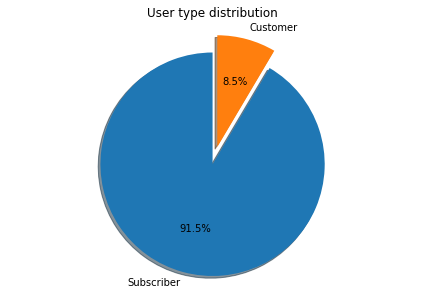

In [16]:
# By plotting Bar chart , we can identify the disturbution of Q1.
labels = list(go_bike_q1.user_type.unique())
sizes = go_bike_q1.user_type.value_counts()
explode = (0.16, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 , explode = explode )

ax1.axis('equal')  
plt.tight_layout()
plt.title('User type distribution')
plt.show()

**The majority of the bikers are `subscribers`.**

**Q/ What is the age distribution of the bikers?**

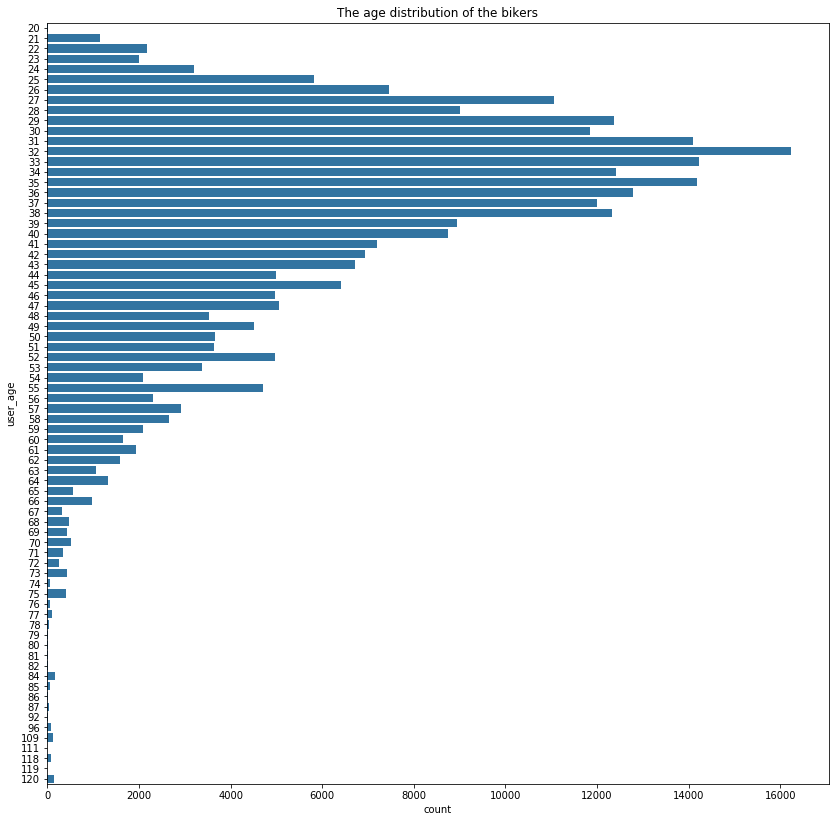

0    32
dtype: int32
38.50611246943765


In [17]:
# By plotting Bar chart , we can identify the disturbution of bikers ages.
base_color = sb.color_palette()[0]
plt.figure(figsize=[14, 14])

ax = sb.countplot(data = go_bike_q1, y = 'user_age', color = base_color)
# Set title
ax.set_title("The age distribution of the bikers")
plt.show()
print(go_bike_q1.user_age.mode())
print(go_bike_q1.user_age.mean())

**The distribution is right skewed , the mode is 32 and the mean is 38.5.**

### - Bivariate Exploration


**Q/ Is there strong relationship between User`s age and trip duration ?**

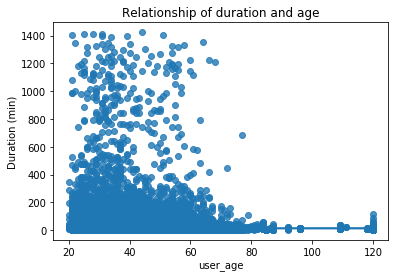

In [18]:
#Scatter plot chart
sb.regplot(data = go_bike_q1, x = 'user_age', y = 'duration_min')
plt.ylabel('Duration (min)')
plt.title('Relationship of duration and age')
plt.show()

**Since the above chart is uninterpretable , i suggest to use correlation plot instead.**

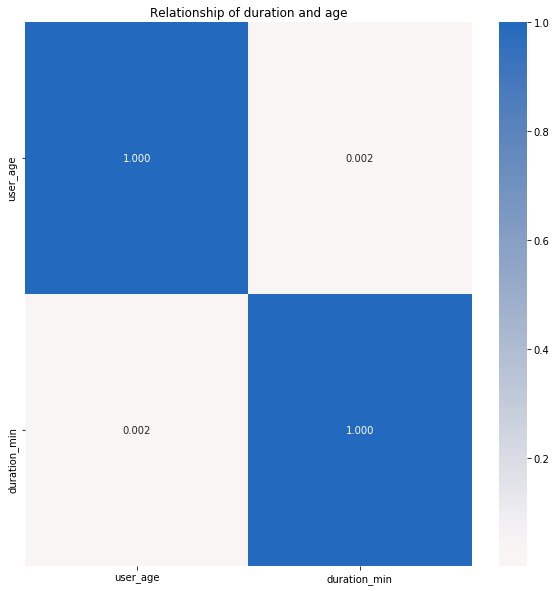

In [19]:
# Heat map display correlation between age and duration
numeric_vars = ['user_age', 'duration_min']

plt.figure(figsize = [10 , 10])
sb.heatmap(go_bike_q1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship of duration and age')
plt.show()

#this code is Provided by project example from class room - Refernce : file:///C:/Users/Welcome/AppData/Local/Temp/Rar$EXa1068.1648/Example%20Project/Example_Project_Diamonds_Part1.html

In [20]:
go_bike_q1.corr().duration_min

duration_min               1.000000
duration_sec               1.000000
start_station_id          -0.008104
start_station_latitude     0.004316
start_station_longitude   -0.013516
end_station_id            -0.004411
end_station_latitude       0.004587
end_station_longitude     -0.014334
bike_id                   -0.003814
member_birth_year         -0.001913
user_age                   0.001913
Name: duration_min, dtype: float64

**0.002 is considered to be tiny value. So , based on that value there is no significant relationship between trip duration and user`s age.** 


**Q/Which gender and user type tend to spend more trip duration?**

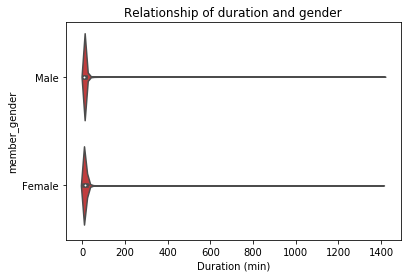

In [21]:
#Violin plot
base_color = sb.color_palette()[3]
sb.violinplot(data = go_bike_q1[go_bike_q1['member_gender'] != "Other"], y = 'member_gender', x = 'duration_min', color = base_color )
plt.xlabel('Duration (min)')
plt.title('Relationship of duration and gender')
plt.show()

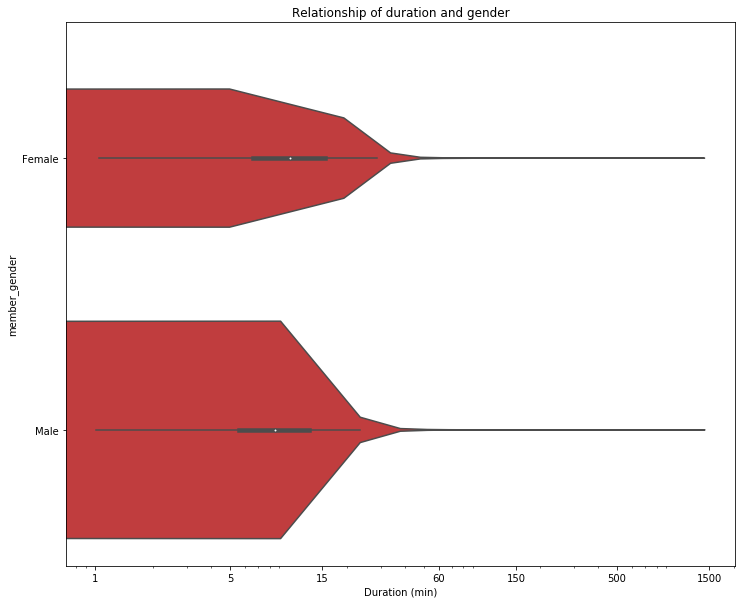

In [22]:
#Since there is large data and the plot is hard to interpret , we prefer to use a  large sample insted.
#Sample of 100k values.
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(go_bike_q1['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=(12,10))
samples = np.random.choice(go_bike_q1.shape[0], 100000, replace = False);
bike_samp = go_bike_q1.iloc[samples,:];
base_color = sb.color_palette()[3]
plt.xscale('log')
sb.violinplot(data = bike_samp[bike_samp['member_gender'] != "Other"] , y = 'member_gender', x = 'duration_min', color = base_color )
plt.xlabel('Duration (min)')
plt.title('Relationship of duration and gender')
plt.xticks([1, 5, 15 , 60 , 150 , 500 , 1500] , [1, 5, 15 , 60 , 150 , 500 , 1500])
plt.show()

In [23]:
#evaluate the mean.
male = go_bike_q1[go_bike_q1['member_gender'] == "Male"]
female = go_bike_q1[go_bike_q1['member_gender'] == "Female"]
print(male.duration_min.mean() , female.duration_min.mean())


11.52946477275209 14.538118031443855


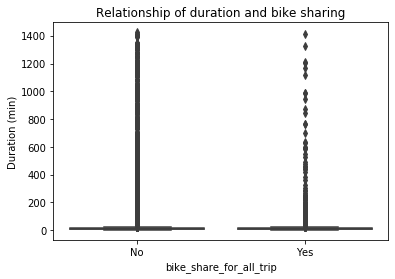

In [24]:
#Box plot
base_color = sb.color_palette()[2]
sb.boxplot(data =go_bike_q1, x = 'bike_share_for_all_trip', y = 'duration_min', color = base_color )
plt.ylabel('Duration (min)')
plt.title('Relationship of duration and bike sharing')
plt.show()

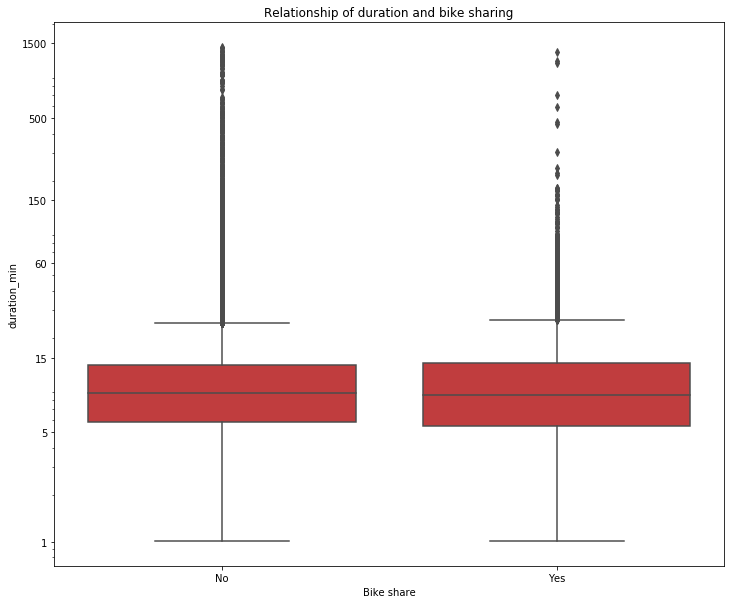

In [25]:
#Since there is large data and the plot is hard to interpret , we prefer to use a  large sample insted.
#Sample of 100k values.
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(go_bike_q1['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=(12,10))
samples = np.random.choice(go_bike_q1.shape[0], 100000, replace = False);
bike_samp = go_bike_q1.iloc[samples,:];
base_color = sb.color_palette()[3]
plt.yscale('log')
sb.boxplot(data = bike_samp, x = 'bike_share_for_all_trip', y = 'duration_min', color = base_color )
plt.xlabel('Bike share')
plt.title('Relationship of duration and bike sharing')
plt.yticks([1, 5, 15 , 60 , 150 , 500 , 1500] , [1, 5, 15 , 60 , 150 , 500 , 1500])
plt.show()

In [26]:
#Evaluate the mean .
yes = go_bike_q1[go_bike_q1['bike_share_for_all_trip'] == "Yes"]
no = go_bike_q1[go_bike_q1['bike_share_for_all_trip'] == "No"]
print(yes.duration_min.mean() , no.duration_min.mean())

13.110566236870946 12.245861894172753


**From charts above and results , we can conclude that Female tend to spend more time in a trip than male and Bike sharing influnce positively on duration per trip.**

**Q/ Which gender is most presented in first quarter?** 

Text(0.5, 1.0, 'Gender per month')

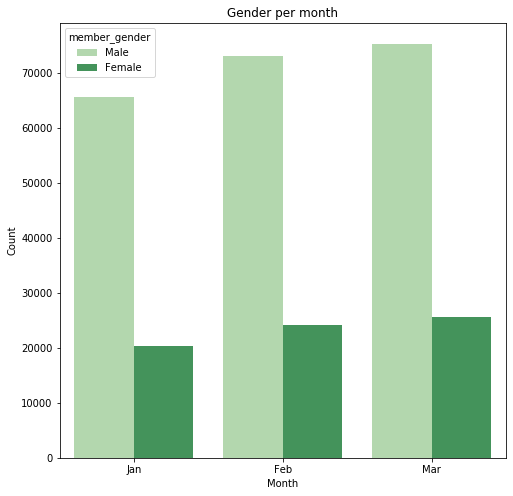

In [27]:
#Clustered Bar chart
plt.figure(figsize = [8, 8])
sb.countplot(data = go_bike_q1[go_bike_q1['member_gender'] != "Other"] , x = 'month', hue = 'member_gender', palette = 'Greens')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Gender per month')


In [28]:
go_bike_q1.member_gender.value_counts() / len(go_bike_q1) *100

Male      74.279701
Female    24.306443
Other      1.413856
Name: member_gender, dtype: float64

**Males bikers are more than females bikers in the first quarter.**


**We have to consider this point in order to make accurate interpretation.**

### - Multivariate Exploration

**Features related to the users**

C:\Users\Welcome\Saud\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Welcome\Saud\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


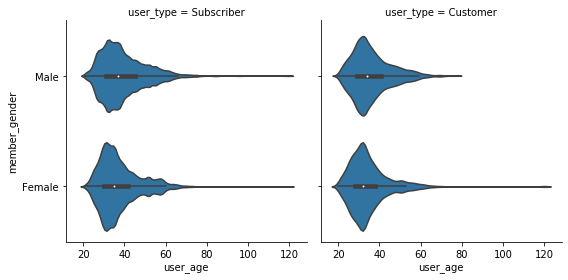

In [29]:
#Faceting plots
g = sb.FacetGrid(data = go_bike_q1[go_bike_q1['member_gender'] != "Other"] , col = 'user_type', size = 4 )
g.map(sb.violinplot, 'user_age', 'member_gender')


In [30]:
go_bike_q1[(go_bike_q1['user_type'] == "Customer") & (go_bike_q1['member_gender'] == "Male") ].user_age.max()

77

**the majority of Female subscribers and Customers are in interval of (25~40) years old.**

**a few Male subscribers are above 100 years old meanwhile the oldest Male customer is 77!**.  


- **Q/Which month has spent more duration minutes and by which gender?** 

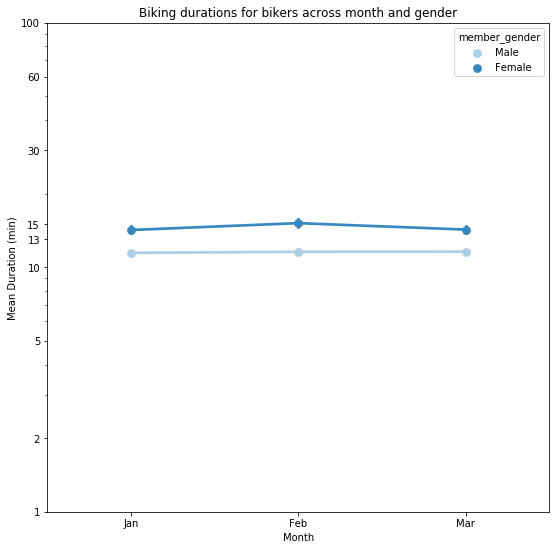

In [31]:
#Point plot for mean duration
fig = plt.figure(figsize = [9,9]);
ax = sb.pointplot(data = go_bike_q1[go_bike_q1['member_gender'] != "Other"] , x = 'month', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Blues')
plt.xlabel('Month')
plt.title('Biking durations for bikers across month and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10,  13, 15 , 30, 60 , 100], [1, 2, 5, 10,  13 ,  15 , 30 , 60 , 100]);


- **Males have stable duration mean over the first 3 motnhs.**
- **Females spent more duration minutes in Feburary**.
- **On averge , Females spend more duration minutes in a trip than males.** 

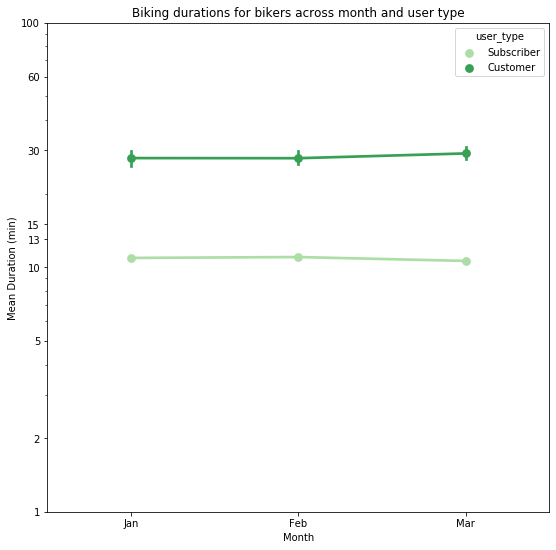

In [32]:
#Point plot for mean duration
fig = plt.figure(figsize = [9,9]);
ax = sb.pointplot(data = go_bike_q1 , x = 'month', y = 'duration_min', hue = 'user_type', 
                  palette = 'Greens')
plt.xlabel('Month')
plt.title('Biking durations for bikers across month and user type');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10,  13, 15 , 30, 60 , 100], [1, 2, 5, 10,  13 ,  15 , 30 , 60 , 100]);

In [33]:
#Evaluate mean of user type.
Customer = go_bike_q1[go_bike_q1['user_type'] == "Customer"]
Subscriber = go_bike_q1[go_bike_q1['user_type'] == "Subscriber"]
print(Customer.duration_min.mean() , Subscriber.duration_min.mean() , Customer.duration_min.mean()/Subscriber.duration_min.mean() )

28.393676091493088 10.834198491823386 2.620745421354603


**The chart above indicates that on averege ,  Customers spend more minutes on a trip than Subscribers by 160% !.**

C:\Users\Welcome\Saud\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


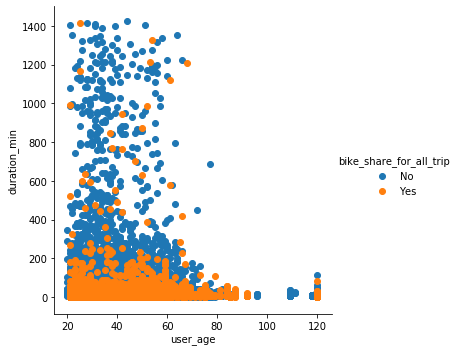

In [34]:
#Scatter plot plus cateogrical variable represened by colors.
g = sb.FacetGrid(data = go_bike_q1, hue = 'bike_share_for_all_trip', size = 5)
g.map(plt.scatter, 'user_age', 'duration_min')
g.add_legend()

**Because of huge data represented as points and  located in one plot , the plot is difficult to be interpreted accurately but we can conclude that non sharing trips more likley to spend more minutes than sharing trips.** 

## Observed results 

**During the exploration process we figured out that :** 



- the variables we discussed on this dataset seemed to be strongly independant , in the other hand the interaction between some features seemed to has more effect on each other.
- The majority of bike riders are between 25 to 45 years old.
- There are less bikers in Jan comparing with Mar & Feb. (Seasonality , climate and vacation could be the main reason - need more investigation).
- Males are more likley to bike (Males constitue the majority of the dataset by 74% and females constitue just 25%) despite  the fact that females tend to spend more duration per a trip !.
- Customer bikers spend more time riding a bike in comparison of Subscribe bikers.
  

## Referncees
 - the Dataset of Fordgobike 2018 provided here https://s3.amazonaws.com/fordgobike-data/index.html

In [37]:

from subprocess import call
call(['python', '-m', 'nbconvert', 'FordGoBike-explanatory.ipynb'])

0

In [40]:
! jupyter nbconvert FordGoBike-explanatory.ipynb  --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook FordGoBike-explanatory.ipynb to slides
[NbConvertApp] Writing 347663 bytes to FordGoBike-explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Welcome\Saud\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Welcome\Saud\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Welcome\Saud\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Welcome\Saud\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Welcome\Saud\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\User